C:\Users\poeun\anaconda3\envs\tf2.2\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\poeun\anaconda3\envs\tf2.2\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
Epoch 1/9
16/16 [==============================] - 0s 30ms/step - loss: 2.5720 - accuracy: 0.5277 - val_loss: 1.7078 - val_accuracy: 0.6270
Epoch 2/9
16/16 [==============================] - 0s 23ms/step - loss: 1.4042 - accuracy: 0.7022 - val_loss: 1.2975 - val_accuracy: 0.7070
Epoch 3/9
16/16 [==============================] - 0s 23ms/step - loss: 1.0515 - accuracy: 0.7762 - val_loss: 1.1429 - val_accuracy: 0.7600
Epoch 4/9
16/16 [==============================] - 0s 23ms/step - loss: 0.8279 - accuracy: 0.8302 - val_loss: 1.0513 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 0s 23ms/step - los

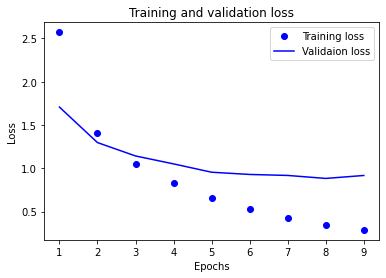

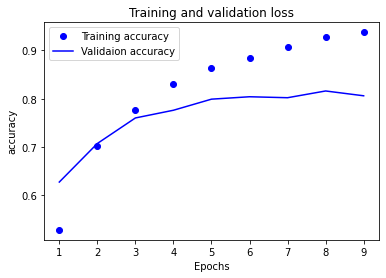

(46,)
0.99999976
4


In [42]:
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
from tensorflow.keras import models, layers

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

# 8982개의 훈련 샘플과 2246개의 테스트 샘플이 있다.
print(len(train_data))
print(len(test_data))

# IMDB 리뷰처럼 각 샘플은 정수 리스트이다. (단어 인덱스)
print(train_data[0])
# 결과 값
# [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 
# 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 
# 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 
# 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]

# 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

# 샘플에 연결된 레이블은 토픽의 인덱스로 0과 45 사이의 정수이다.
print(train_labels[10]) # 3

# 데이터 준비

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1
#     return results

# one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환 
# one_hot_test_labels = to_one_hot(test_labels)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# 출력 클래스의 개수가 46개로 늘어났다. 출력 공간의 차원이 훨씬 커졌다.
# 16차원 공간은 46개의 클래스를 구분하기에는 너무 제약이 많기 때문에 64개의 유닛을 이용한다.

# 모델 정의하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 마지막 Dense 층의 크기가 46이다. 각 입력 샘플에 대해서 46차원의 벡터를 출력한다는 뜻이다.
# 이 벡터의 각 원소(각 차원)는 각기 다른 출력 클래스가 인코딩된 것이다.

# softmax -> 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력한다.
# 즉, 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률이다.
# 46개의 값을 모두 더하면 1이 된다.

# 손실 함수 : categorical_crossentropy 
# 이 함수는 두 확률 분포 사이의 거리를 측정한다.
# 여기에서는 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리이다.
# 두 분포 사이의 거리를 최소화하면 진짜 레이블에 가능한 가까운 출력을 내도록 모델을 훈련하게 된다.

# 모델 컴파일하기
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# 훈련 데이터에서 1000개의 샘플을 따로 떼어서 검증 세트로 사용한다.
# 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# 모델 훈련하기
history = model.fit(
    partial_x_train,
    partial_y_train,
    batch_size=512,
    epochs=9, # epochs가 9부터 과대적합이 일어나므로 9로 설정
    validation_data=(x_val, y_val)
)

results = model.evaluate(x_test, one_hot_test_labels)
print(results) # 약 78%의 정확도 
# [1.0235412120819092, 0.7849510312080383]


history.history.keys()
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validaion loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validaion accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

# 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

print(predictions[0].shape) # (46,)
print(np.sum(predictions[0])) # 0.99999994
print(np.argmax(predictions[0])) # 3

In [41]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

(46,)
0.99999994
3
